# 1. Introduction

This [dataset](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) contain medical information of patients that can be used to predict if a patinet is more likely to have heart problem or not. We explore the dataset and classify the target variable using three different classifiers (LDA, QDA, and decision tree) to findout which algorithm is more suitable for this dataset.


# 2. Reading the Data

Read the heart.csv file using pandas.

In [1]:
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Read the data 
data = pd.read_csv('heart.csv')
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


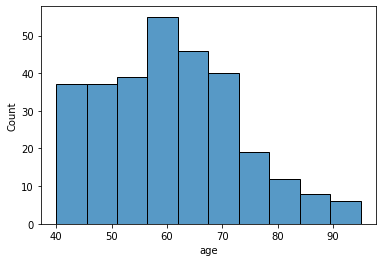

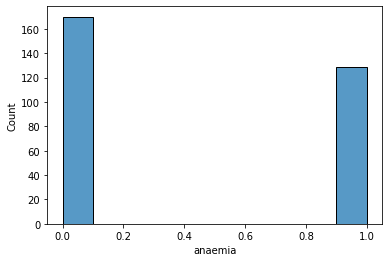

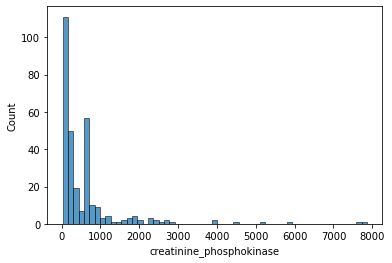

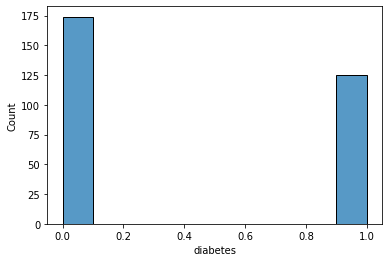

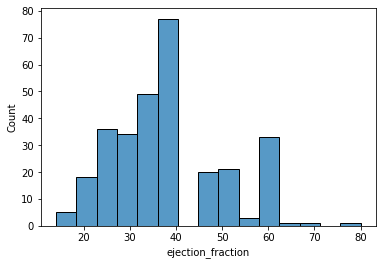

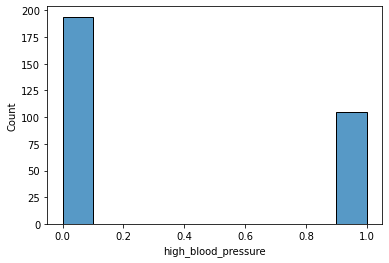

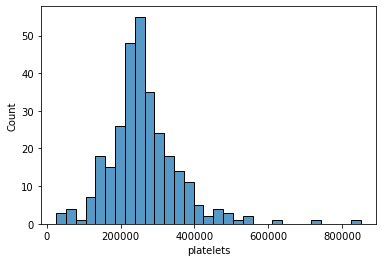

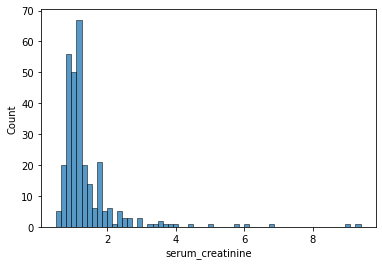

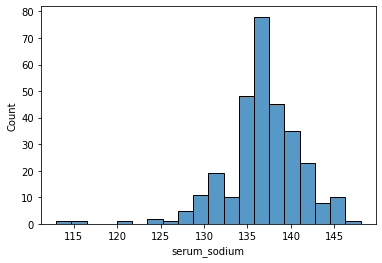

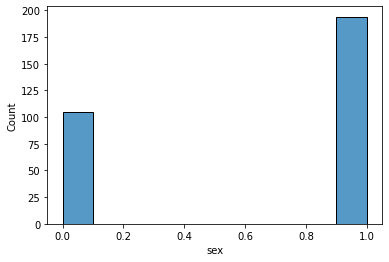

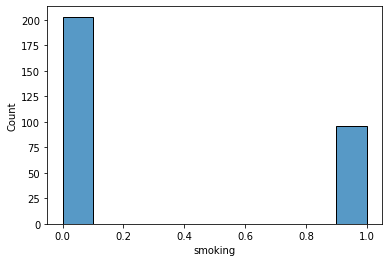

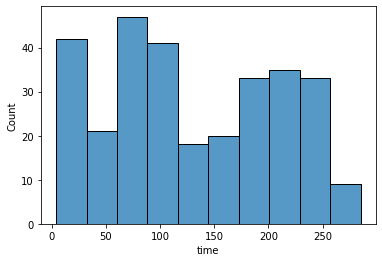

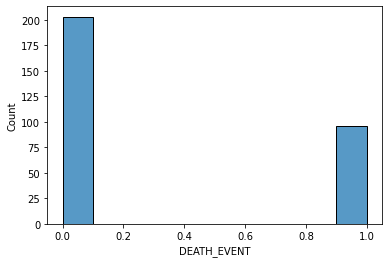

In [2]:
# visualize data

parameters = data.columns

for item in parameters:
    
    sns.histplot(data=data, x=item)
    plt.show()

## 2.1 Generate training and test samples

In [3]:
# data splitting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# predicted value
y = data["DEATH_EVENT"]

# predictors - contineuos variables for LDA/QDA

X = data[['age','creatinine_phosphokinase','serum_sodium','serum_creatinine']]

# use this for cases that can accomodate categorial inputs
#X = data.drop('output',axis=1)


# standardize the data : zero mean, unit variance

X = StandardScaler().fit_transform(X)

# cross-vcalidate by splitting the data into training and test sets (20% of data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 609)

# Instructions for Sections 2.2 - 2.8:

Implement the classification algorithm using built-in functions in sklearn. Train the model using the training data and then test it using the test data. Show a confusion matrix to show the true-positives, false-positives, false-negatives and true-negatives when the trained model is applied to the test data. 

## 2.2 Linear Discriminant Analysis Classifier

Accuracy of Linear Discriminant Analysis is 80.0000%


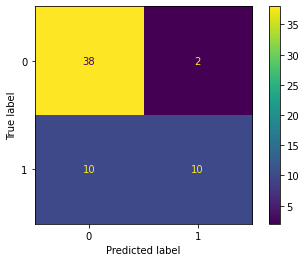

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

# LDA fit
m1 = 'Linear Discriminant Analysis'

lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
lda_y_predicted = lda.fit(X_train, y_train).predict(X_test)

# get the accuracy score
lda_accuraccy_score = accuracy_score(y_test, lda_y_predicted)
print(f'Accuracy of Linear Discriminant Analysis is {lda_accuraccy_score*100:.4f}%')


# get the confusion matrix
lda_conf_matrix = confusion_matrix(y_test, lda_y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=lda_conf_matrix,display_labels=lda.classes_)
disp.plot()
plt.show()



## 2.2 Quadratic Discriminant Analysis Classifier

Accuracy of Quadratic Discriminant Analysis is 78.3333%


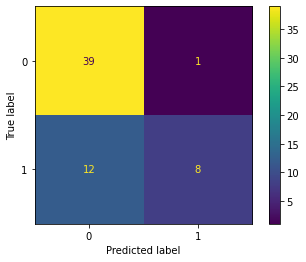

In [5]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

#accuracy_score,roc_curve,classification_report
m2 = 'Quadratic Discriminant Analysis'

qda = qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda_y_predicted = qda.fit(X_train, y_train).predict(X_test)


# get the accuracy score
qda_accuraccy_score = accuracy_score(y_test, qda_y_predicted)
print(f'Accuracy of Quadratic Discriminant Analysis is {qda_accuraccy_score*100:.4f}%')

# get the confusion matrix
qda_conf_matrix = confusion_matrix(y_test, qda_y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=qda_conf_matrix,display_labels=qda.classes_)
disp.plot()
plt.show()


## 2.4 Decision Tree Classifier

Accuracy of DecisionTreeClassifier: 73.3333%


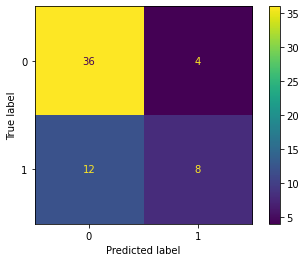

In [6]:
from sklearn.tree import DecisionTreeClassifier

m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 3)
dt.fit(X_train, y_train)
dt_y_predicted = dt.predict(X_test)


# get the accuracy score
dt_acc_score = accuracy_score(y_test, dt_y_predicted)
print(f'Accuracy of DecisionTreeClassifier: {dt_acc_score*100:.4f}%')

# confusion matrix
dt_conf_matrix = confusion_matrix(y_test, dt_y_predicted)

disp = ConfusionMatrixDisplay(confusion_matrix=dt_conf_matrix,display_labels=dt.classes_)
disp.plot()
plt.show()



## 2.5 Logistic Regression

Accuracy of LogisticRegression: 73.3333%


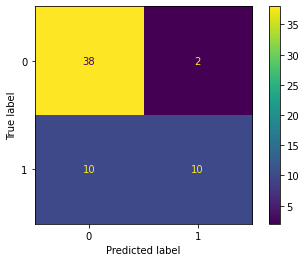

In [7]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
lr_y_predicted = lr.predict(X_test)


# get the accuracy score
lr_acc_score = accuracy_score(y_test, lr_y_predicted)
print(f'Accuracy of LogisticRegression: {lr_acc_score*100:.4f}%')

# confusion matrix
lr_conf_matrix = confusion_matrix(y_test, lr_y_predicted)

disp = ConfusionMatrixDisplay(confusion_matrix=lr_conf_matrix,display_labels=lr.classes_)
disp.plot()
plt.show()


## 2.6 Random Forest

Accuracy of LogisticRegression: 76.6667%


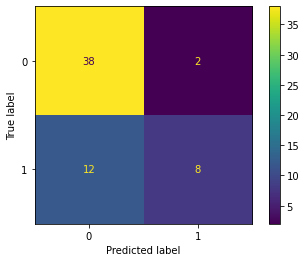

In [8]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(X_train, y_train)

rfc_y_predicted = rfc.predict(X_test)


# get the accuracy score
rfc_acc_score = accuracy_score(y_test, rfc_y_predicted)
print(f'Accuracy of LogisticRegression: {rfc_acc_score*100:.4f}%')

# confusion matrix
rfc_conf_matrix = confusion_matrix(y_test, rfc_y_predicted)

disp = ConfusionMatrixDisplay(confusion_matrix=rfc_conf_matrix,display_labels=rfc.classes_)
disp.plot()
plt.show()

## 2.7 Support Vector Machine

Accuracy of LogisticRegression: 76.6667%


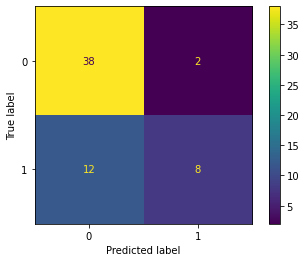

In [9]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=2)
svm.fit(X_train, y_train)

svm_y_predicted = svm.predict(X_test)


# get the accuracy score
svm_acc_score = accuracy_score(y_test, svm_y_predicted)
print(f'Accuracy of LogisticRegression: {svm_acc_score*100:.4f}%')

# confusion matrix
svm_conf_matrix = confusion_matrix(y_test, svm_y_predicted)

disp = ConfusionMatrixDisplay(confusion_matrix=svm_conf_matrix,display_labels=svm.classes_)
disp.plot()
plt.show()

## 2.8 Naive Bayes

Accuracy of LogisticRegression: 76.6667%


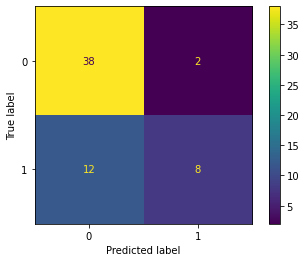

In [10]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train,y_train)
nb_y_predicted = nb.predict(X_test)

nb_conf_matrix = confusion_matrix(y_test, nb_y_predicted)
nb_acc_score = accuracy_score(y_test, nb_y_predicted)


print(f'Accuracy of LogisticRegression: {nb_acc_score*100:.4f}%')

# confusion matrix
nb_conf_matrix = confusion_matrix(y_test, nb_y_predicted)

disp = ConfusionMatrixDisplay(confusion_matrix=nb_conf_matrix,display_labels=nb.classes_)
disp.plot()
plt.show()

## 2.9 Reciver Operating Characterstic Curve

Plot the reciever operating curve (True Positive Rate vs False Positve Rate ) for each method

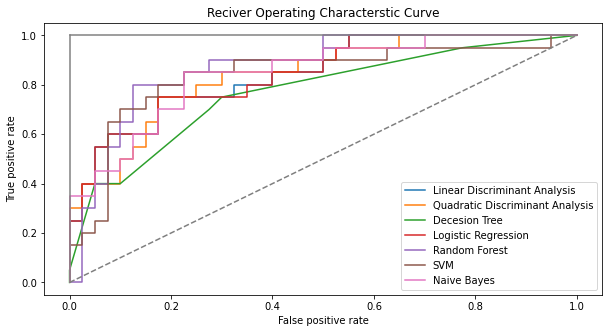

In [11]:
from sklearn.metrics import roc_curve



lda_predicted_probability_of_positive = lda.predict_proba(X_test)[:,1]
qda_predicted_probability_of_positive = qda.predict_proba(X_test)[:,1]
dt_predicted_probability_of_positive = dt.predict_proba(X_test)[:,1]
lr_predicted_probability_of_positive = lr.predict_proba(X_test)[:,1]
rfc_predicted_probability_of_positive = rfc.predict_proba(X_test)[:,1]
svm_predicted_decision_function = svm.decision_function(X_test)
nb_predicted_probability_of_positive = nb.predict_proba(X_test)[:,1]


lda_false_positive_rate,lda_true_positive_rate,lda_threshold = roc_curve(y_test,lda_predicted_probability_of_positive)
qda_false_positive_rate,qda_true_positive_rate,qda_threshold = roc_curve(y_test,qda_predicted_probability_of_positive)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted_probability_of_positive)
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predicted_probability_of_positive)
rfc_false_positive_rate,rfc_true_positive_rate,rfc_threshold = roc_curve(y_test,rfc_predicted_probability_of_positive)
svm_false_positive_rate,svm_true_positive_rate,svm_threshold = roc_curve(y_test,svm_predicted_decision_function)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nb_predicted_probability_of_positive)


#sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lda_false_positive_rate,lda_true_positive_rate,label='Linear Discriminant Analysis')
plt.plot(qda_false_positive_rate,qda_true_positive_rate,label='Quadratic Discriminant Analysis')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Decesion Tree')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(rfc_false_positive_rate,rfc_true_positive_rate,label='Random Forest')
plt.plot(svm_false_positive_rate,svm_true_positive_rate,label='SVM')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')


plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()